#Sentiment Analysis

In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
!pip install tensorflow --upgrade

In [5]:
%tensorflow_version 2.x

In [6]:
import tensorflow_datasets as tfds
import tensorflow_hub as hub

***Downloading Movie Review Dataset***

In [7]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [9]:
(train_data, validation_data, test_data), metadata = tfds.load('imdb_reviews',
                                                     split=["train[:80%]","train[80%:90%]","train[90%:]"],
                                                     data_dir="./dataset",
                                                     as_supervised=True,
                                                     with_info=True)

In [10]:
Total_data = tfds.load('imdb_reviews')

In [11]:
type(Total_data)

dict

In [12]:
len(Total_data)

3

In [13]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [14]:
print(train_data)

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>


In [15]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [16]:
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [17]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

***Using Word to Vec***

***Converting Word2Vec by Transfer Learning***

In [18]:
pretrained_model = 'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1'

***Making layer which convert text into embeddding vector***

In [19]:
hub_layer = hub.KerasLayer(pretrained_model, input_shape = [], dtype=tf.string, trainable=True)

In [20]:
train_examples_batch[:2]

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [21]:
hub_layer(train_examples_batch[:2])

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ]],
      dtype=float32)>

In [22]:
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

***Creating Actual Neural Network***

In [23]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


***Compiling Neural Network***

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

***Training Model***

In [25]:
model.fit(train_data.shuffle(10000).batch(512),
          epochs=20,
          validation_data=validation_data.batch(512),
          verbose=1)

Epoch 1/20
40/40 [==============================] - 4s 62ms/step - loss: 0.6674 - accuracy: 0.6016 - val_loss: 0.5921 - val_accuracy: 0.6884
Epoch 2/20
40/40 [==============================] - 3s 60ms/step - loss: 0.5670 - accuracy: 0.7117 - val_loss: 0.5271 - val_accuracy: 0.7420
Epoch 3/20
40/40 [==============================] - 3s 57ms/step - loss: 0.5047 - accuracy: 0.7619 - val_loss: 0.4795 - val_accuracy: 0.7772
Epoch 4/20
40/40 [==============================] - 3s 59ms/step - loss: 0.4533 - accuracy: 0.8004 - val_loss: 0.4388 - val_accuracy: 0.8072
Epoch 5/20
40/40 [==============================] - 3s 58ms/step - loss: 0.4086 - accuracy: 0.8269 - val_loss: 0.4059 - val_accuracy: 0.8232
Epoch 6/20
40/40 [==============================] - 3s 62ms/step - loss: 0.3704 - accuracy: 0.8455 - val_loss: 0.3798 - val_accuracy: 0.8368
Epoch 7/20
40/40 [==============================] - 3s 60ms/step - loss: 0.3383 - accuracy: 0.8615 - val_loss: 0.3620 - val_accuracy: 0.8464
Epoch 8/20
40

In [26]:
x_test, y_test = next(iter(test_data.batch(512)))

In [27]:
y_pred = model.predict(x_test)

In [28]:
y_pred = y_pred.flatten()

In [29]:
for i in range(len(y_pred)):
  y_pred[i]=round(y_pred[i])

***Checking the accuracy***

In [30]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


In [31]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.904296875


In [32]:
print("Precision:", metrics.precision_score(y_test,y_pred, average='macro'))

print("Recall:", metrics.recall_score(y_test,y_pred,average='macro'))

Precision: 0.9037642533315016
Recall: 0.9056155308838865


In [33]:
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index=['Negative','Positive'], columns=['Negative','Positive'])
df_cm

,Negative,Positive
Negative,243,31
Positive,18,220


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
def show_confusion_matrix(confusion_matrix):

  hmap = sns.heatmap(confusion_matrix, annot=True, fmt= "d", cmap= "Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation= 0, ha = 'right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation= 30, ha = 'right')
  plt.ylabel('Excepted Sentiment')
  plt.xlabel('Predicted Sentiment');

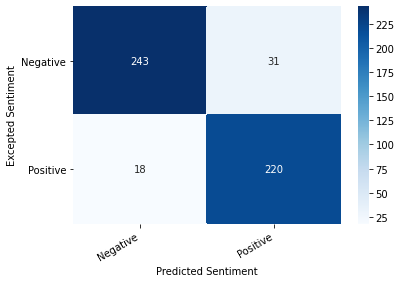

In [36]:
show_confusion_matrix(df_cm)

***Declaring Function***

In [37]:
def mymodel(text):

  result = model.predict([text])
  if result >= 0.7:
    print('Sentiment is positive')
  elif 0.3<result<0.7 :
    print('Sentiment is  Neutral')
  else:
    print('Sentiment is  negative')

  return print( result)


***Testing on Paragraph***

***positive paragraph***

In [38]:
text1 = '''Released in 1999, American Beauty shocked the audience, questioning the very basis of the American family life ideal. 
        A powerful and provoking tragical comedy, created by Sam Mendes and a wonderful cast of Kevin Spacey (Lester Burnham), 
        Annette Benning (Caroline Burnham), Mena Suvari (Angela Hayes) and Thora Birch (Jane Burham), 
        exploits the usual topic of the midlife crisis, but uncovers a deep hidden conflict of the personality feeling oppressed within the limits of the “normal” life and the society,
        which uses a wide range of tools to make you behave in the correct way'''


***positive paragraph***

In [39]:
text2 = '''Life is not always sweet like honey. Sometimes its sad. There are also the painful pages full of lovesickness and suffering.
            It is precisely these in which the emotional world of people often gets out of hand, fluctuates and is particularly susceptible to consoling words.
            In such times sad love paragraphs are especially welcome because they can signal hope to the recipient and show him that there are people around him who are happy to assist and support him during this difficult time. 
            Many people indulge in melancholy in such phases, and then search for sad love spells that reinforce their feelings.
            Which occasion has driven you to this page is irrelevant. However, the fact is that there is one sadness or another that we present to you now.'''

***positive statement***

In [40]:
text3 = 'This view is amazing'

***neutral statement***

In [41]:
text4 = 'There is a book on the desk'

***negative statement***

In [42]:
text5 = 'This view is horrible'

***Checking the results***

In [43]:
mymodel(text1)

Sentiment is positive
[[0.96984464]]


In [44]:
mymodel(text2)

Sentiment is positive
[[0.9894202]]


In [45]:
mymodel(text3)

Sentiment is positive
[[0.9953475]]


In [46]:
mymodel(text4)

Sentiment is  Neutral
[[0.34404218]]


In [47]:
mymodel(text5)

Sentiment is  negative
[[0.03869703]]


#Thank You

***Deepak Kumar Singh***